In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [ ]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/content/drive/MyDrive/data/normal')):
            y.append('NORMAL')
        else:
            y.append('POTHOLE')
    except:
        pass

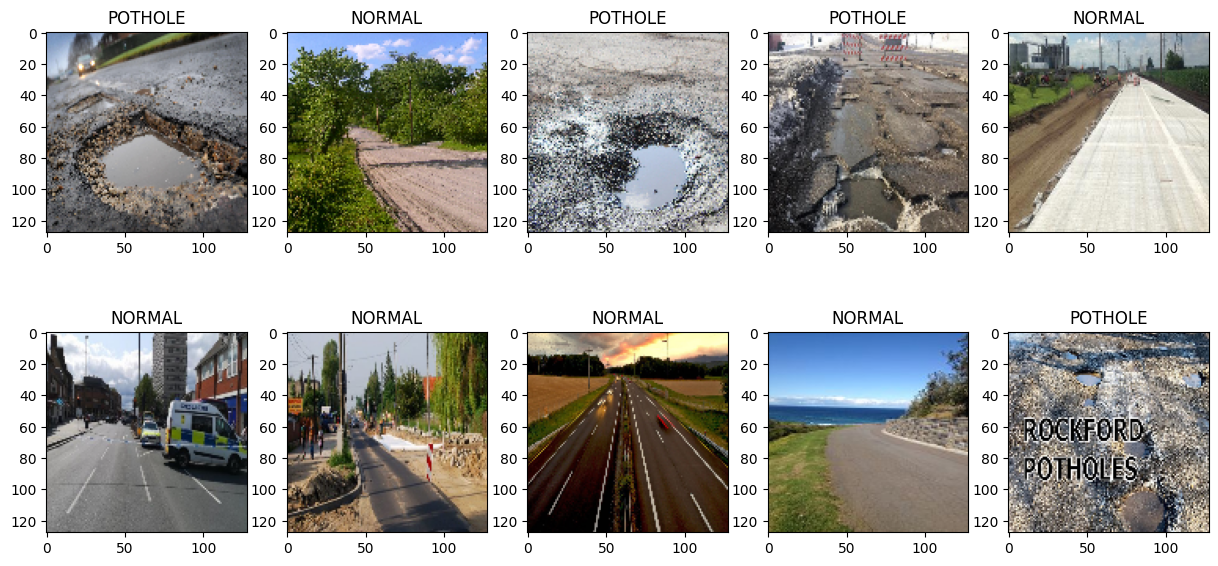

In [ ]:

import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)

X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 122, 122, 64)      9472      
                                                                 
 batch_normalization_30 (Bat  (None, 122, 122, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 57, 57, 128)       204928    
                                                                 
 batch_normalization_31 (Bat  (None, 57, 57, 128)      512       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_scheduler(epoch):
    initial_lr = 0.001
    drop = 0.1
    epochs_drop = 5
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr


In [ ]:
lr_callback = LearningRateScheduler(lr_scheduler)

In [ ]:
hist=model.fit(x_train, y_train, epochs=34, batch_size=12, verbose=2,
         validation_data=(x_test, y_test),callbacks=[lr_callback])

Epoch 1/34
43/43 - 5s - loss: 0.8903 - accuracy: 0.6451 - val_loss: 5.4407 - val_accuracy: 0.5706 - lr: 0.0010 - 5s/epoch - 121ms/step
Epoch 2/34
43/43 - 1s - loss: 0.5060 - accuracy: 0.7902 - val_loss: 1.0761 - val_accuracy: 0.6000 - lr: 0.0010 - 1s/epoch - 25ms/step
Epoch 3/34
43/43 - 1s - loss: 0.4334 - accuracy: 0.8255 - val_loss: 3.0991 - val_accuracy: 0.5647 - lr: 0.0010 - 1s/epoch - 25ms/step
Epoch 4/34
43/43 - 1s - loss: 0.5219 - accuracy: 0.8235 - val_loss: 0.4819 - val_accuracy: 0.8059 - lr: 0.0010 - 1s/epoch - 26ms/step
Epoch 5/34
43/43 - 1s - loss: 0.2930 - accuracy: 0.8882 - val_loss: 0.2526 - val_accuracy: 0.8765 - lr: 1.0000e-04 - 1s/epoch - 26ms/step
Epoch 6/34
43/43 - 1s - loss: 0.2414 - accuracy: 0.9118 - val_loss: 0.2580 - val_accuracy: 0.8588 - lr: 1.0000e-04 - 1s/epoch - 26ms/step
Epoch 7/34
43/43 - 1s - loss: 0.2338 - accuracy: 0.9078 - val_loss: 0.2138 - val_accuracy: 0.9118 - lr: 1.0000e-04 - 1s/epoch - 26ms/step
Epoch 8/34
43/43 - 1s - loss: 0.2135 - accuracy: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 0s 19ms/step - loss: 0.2554 - accuracy: 0.9059
Test accuracy: 90.59%


In [ ]:
import numpy
from sklearn import metrics
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()


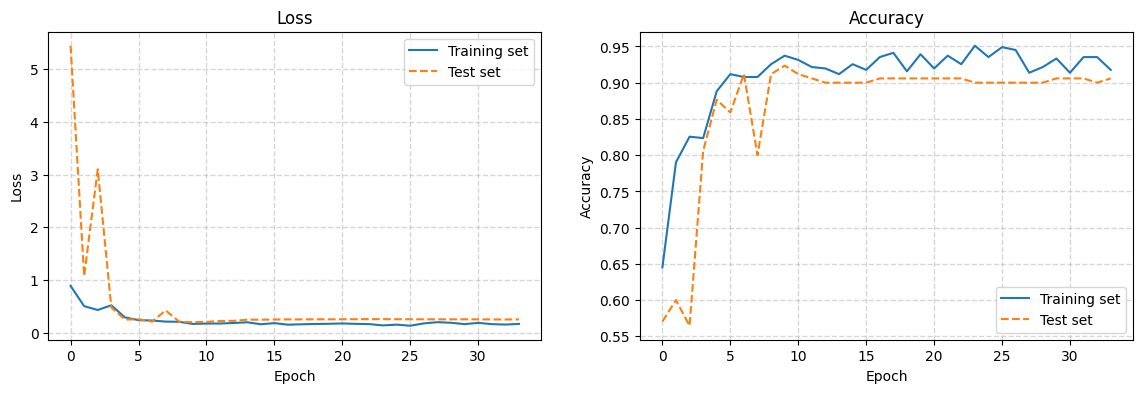

In [ ]:
render_training_history(hist)

In [ ]:
# Making predictions on test data
prediction = model.predict(x_test)


6/6 [==============================] - 0s 17ms/step


In [ ]:
prediction

array([[3.17358822e-01, 6.82641149e-01],
       [9.86772120e-01, 1.32278875e-02],
       [9.97019291e-01, 2.98069813e-03],
       [9.62649065e-04, 9.99037385e-01],
       [9.92958307e-01, 7.04164850e-03],
       [9.99139428e-01, 8.60594795e-04],
       [9.79492843e-01, 2.05071382e-02],
       [7.43717730e-01, 2.56282240e-01],
       [5.38010732e-04, 9.99461949e-01],
       [3.67909996e-03, 9.96320963e-01],
       [2.07770482e-01, 7.92229533e-01],
       [1.30911246e-02, 9.86908853e-01],
       [9.99392271e-01, 6.07699563e-04],
       [9.96499777e-01, 3.50017054e-03],
       [9.86210883e-01, 1.37891183e-02],
       [6.33449972e-01, 3.66550058e-01],
       [9.78158951e-01, 2.18411051e-02],
       [5.43852031e-01, 4.56147939e-01],
       [9.88107085e-01, 1.18929688e-02],
       [7.22945854e-02, 9.27705407e-01],
       [9.90104258e-01, 9.89572797e-03],
       [9.53318536e-01, 4.66815196e-02],
       [7.85882175e-02, 9.21411753e-01],
       [9.84930992e-01, 1.50690479e-02],
       [9.996650

In [ ]:
#Transform predictions into 1D array
y_pred = np.argmax(prediction, axis=1)

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 122, 122, 64)      9472      
                                                                 
 batch_normalization_30 (Bat  (None, 122, 122, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 57, 57, 128)       204928    
                                                                 
 batch_normalization_31 (Bat  (None, 57, 57, 128)      512       
 chNormalization)                                                
                                                      

In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)


In [ ]:
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,84,12
Actual POTHOLES,4,70


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.85      0.95      0.90        74
           0       0.95      0.88      0.91        96

    accuracy                           0.91       170
   macro avg       0.90      0.91      0.91       170
weighted avg       0.91      0.91      0.91       170



In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 47.8 MB/s eta 0:00:00


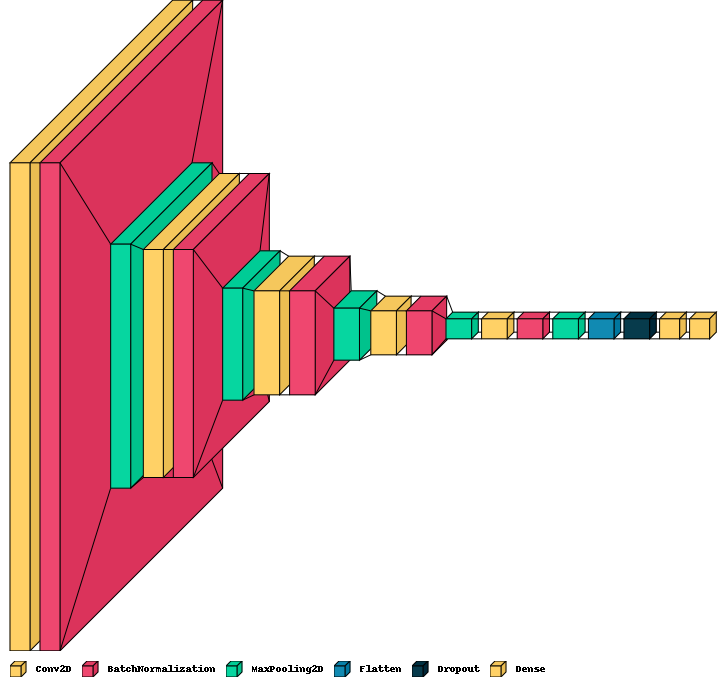

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [ ]:
from keras.utils.vis_utils import plot_model

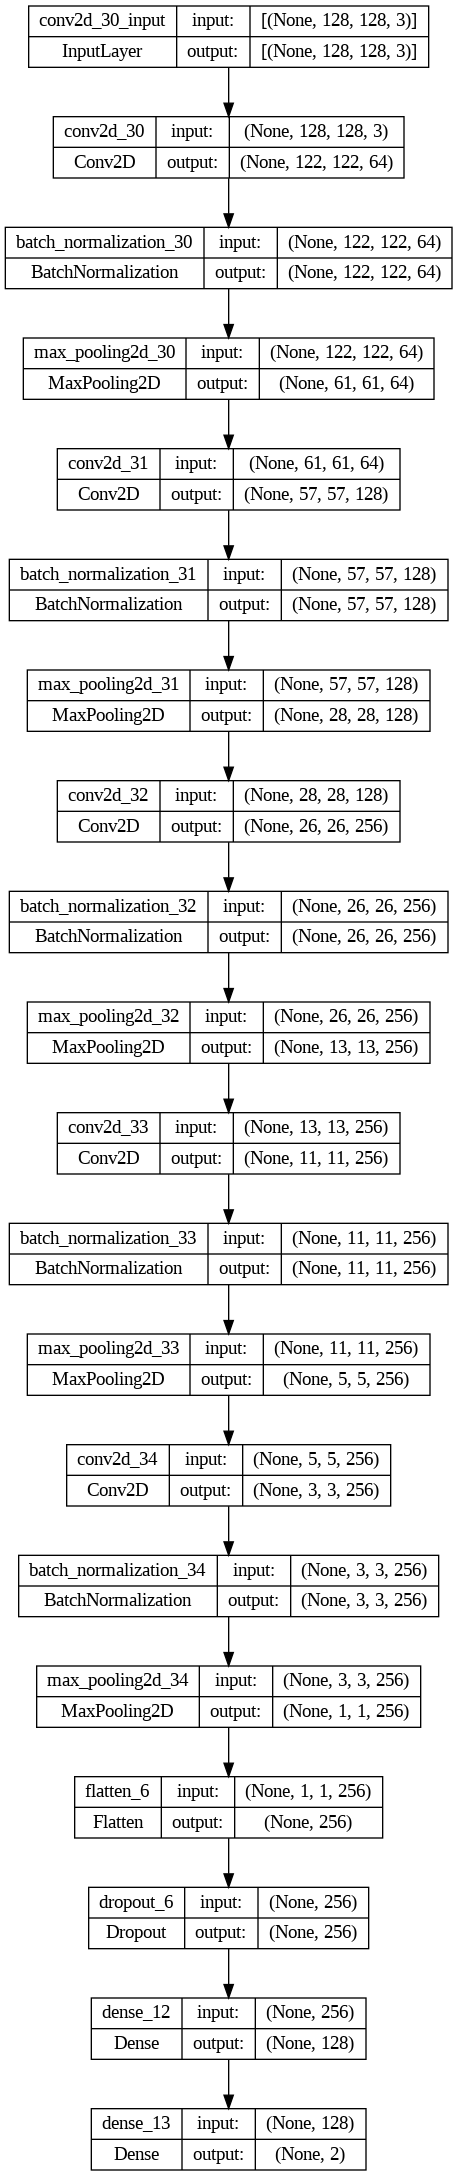

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.save('/content/drive/MyDrive/potmod.h5')